1.importing dependencies


In [ ]:
import pandas as pd
import numpy as np
from numpy.random import rand
from numpy import array
from numpy import hstack
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from tensorflow.keras import optimizers 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Dropout
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
tf.__version__

'2.12.0'

2.Loading shangai.csv data set


3.Loading wuhan.csv data set


In [ ]:
df_wuhan=pd.read_csv("/content/wuhan.csv")
df_wuhan

date  AQI  PM2.5  PM10  SO2  NO2   O3   CO  l_temp  h_temp  temp  \
0      2019/9/1   57     32    49    8   45   95  1.0    25.7    20.2  22.8   
1      2019/9/2  100     35    54   11   38  159  1.1    30.6    20.7  25.5   
2      2019/9/3   74     23    39    9   25  128  0.9    30.6    22.4  26.3   
3      2019/9/4   91     25    44    9   27  149  0.9    32.2    21.1  26.9   
4      2019/9/5  124     29    54   12   38  186  1.2    32.0    23.4  27.1   
..          ...  ...    ...   ...  ...  ...  ...  ...     ...     ...   ...   
483  2020/12/27  216    166   202   21  100   71  1.6    14.8     2.1   7.8   
484  2020/12/28  186    140   168   15   78   82  1.6    16.8     1.7   9.3   
485  2020/12/29   79     58    65    5   29   41  1.1     9.4     0.3   3.2   
486  2020/12/30   43     26    43    7   24   62  0.5     3.2    -3.5  -0.5   
487  2020/12/31   50     19    36    8   40   51  0.5     4.3    -7.6  -2.0   

      wet  wind     hpa  visibility  precipitation  cloud  
0    87.0   0.1  1011.0        11.4            1.0  100.0  
1    74.0   0.6  1012.0        12.3            0.1   88.0  
2    64.0   1.0  1010.0        24.6            0.0   70.0  
3    63.0   1.6  1007.0        17.6            0.0   30.0  
4    67.0   1.0  1005.0        21.6            0.0   64.0  
..    ...   ...     ...         ...            ...    ...  
483  78.0   0.3  1016.0         1.8            0.0   24.0  
484  81.0   0.8  1014.0         1.7            2.7   27.0  
485  87.0   6.2  1026.0         3.9           11.7   90.0  
486  58.0   2.7  1037.0        19.0            0.0   14.0  
487  55.0   0.3  1034.0        23.1            0.0   16.0  

[488 rows x 17 columns]

shape of wuhan data set

In [ ]:
df_wuhan.shape

(488, 17)

getting columns of wuhan data sets

In [ ]:
df_wuhan.columns

Index(['date', 'AQI', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'CO', 'l_temp',
       'h_temp', 'temp', 'wet', 'wind', 'hpa', 'visibility', 'precipitation',
       'cloud'],
      dtype='object')

data types of columns in dataset

In [ ]:
df_wuhan.dtypes

date              object
AQI                int64
PM2.5              int64
PM10               int64
SO2                int64
NO2                int64
O3                 int64
CO               float64
l_temp           float64
h_temp           float64
temp             float64
wet              float64
wind             float64
hpa              float64
visibility       float64
precipitation    float64
cloud            float64
dtype: object

In [ ]:
df_wuhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           488 non-null    object 
 1   AQI            488 non-null    int64  
 2   PM2.5          488 non-null    int64  
 3   PM10           488 non-null    int64  
 4   SO2            488 non-null    int64  
 5   NO2            488 non-null    int64  
 6   O3             488 non-null    int64  
 7   CO             488 non-null    float64
 8   l_temp         486 non-null    float64
 9   h_temp         486 non-null    float64
 10  temp           486 non-null    float64
 11  wet            486 non-null    float64
 12  wind           486 non-null    float64
 13  hpa            464 non-null    float64
 14  visibility     464 non-null    float64
 15  precipitation  486 non-null    float64
 16  cloud          419 non-null    float64
dtypes: float64(10), int64(6), object(1)
memory usage: 64.9

In [ ]:
df_wuhan.isnull().sum()

date              0
AQI               0
PM2.5             0
PM10              0
SO2               0
NO2               0
O3                0
CO                0
l_temp            2
h_temp            2
temp              2
wet               2
wind              2
hpa              24
visibility       24
precipitation     2
cloud            69
dtype: int64

In [ ]:
df_wuhan.fillna(df_wuhan.mean(), inplace=True)

<ipython-input-9-42ab51a6e41d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_wuhan.fillna(df_wuhan.mean(), inplace=True)


In [ ]:
df_wuhan.describe()

AQI       PM2.5        PM10         SO2        NO2          O3  \
count  488.000000  488.000000  488.000000  488.000000  488.00000  488.000000   
mean    75.891393   39.415984   62.221311    8.631148   39.82582   92.526639   
std     31.399174   23.819330   32.722594    3.418036   20.93307   46.743383   
min     20.000000    5.000000    9.000000    4.000000   10.00000    5.000000   
25%     51.000000   24.000000   38.000000    6.000000   24.00000   55.000000   
50%     73.000000   34.000000   57.000000    8.000000   34.00000   88.000000   
75%     95.250000   49.000000   81.000000   10.000000   49.25000  124.250000   
max    223.000000  173.000000  216.000000   24.000000  124.00000  222.000000   

               CO      l_temp      h_temp        temp         wet        wind  \
count  488.000000  488.000000  488.000000  488.000000  488.000000  488.000000   
mean     0.884016   21.279630   12.950000   16.893416   78.333333    1.286008   
std      0.220952    9.007133    8.671044    8.540254   10.538090    0.994198   
min      0.400000    2.400000   -7.600000   -2.000000   43.000000    0.000000   
25%      0.700000   13.800000    5.500000    8.575000   70.000000    0.600000   
50%      0.900000   22.200000   12.750000   17.050000   78.000000    1.000000   
75%      1.000000   28.625000   20.500000   24.100000   87.000000    1.700000   
max      1.800000   37.300000   30.400000   32.200000   99.000000    7.400000   

               hpa  visibility  precipitation       cloud  
count   488.000000  488.000000     488.000000  488.000000  
mean   1015.303879   10.007328       3.218930   62.563246  
std       8.846646    5.920621      10.052939   30.926855  
min     996.000000    1.100000       0.000000    0.000000  
25%    1008.000000    5.475000       0.000000   40.000000  
50%    1016.000000    9.200000       0.000000   62.563246  
75%    1022.000000   13.500000       0.900000   92.000000  
max    1037.000000   30.000000      92.700000  100.000000

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

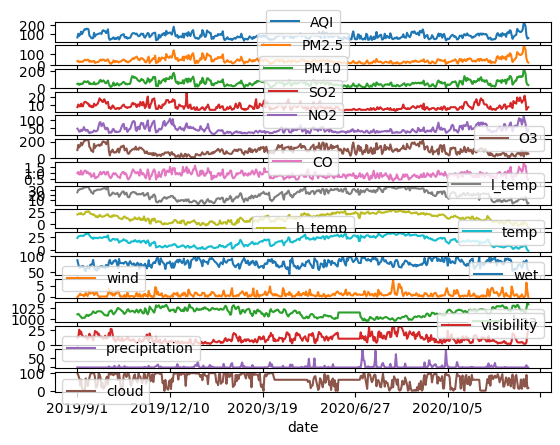

In [ ]:
df_wuhan.set_index('date')[['AQI','PM2.5','PM10','SO2','NO2','O3','CO','l_temp','h_temp','temp','wet','wind','hpa','visibility','precipitation','cloud']].plot(subplots=True)

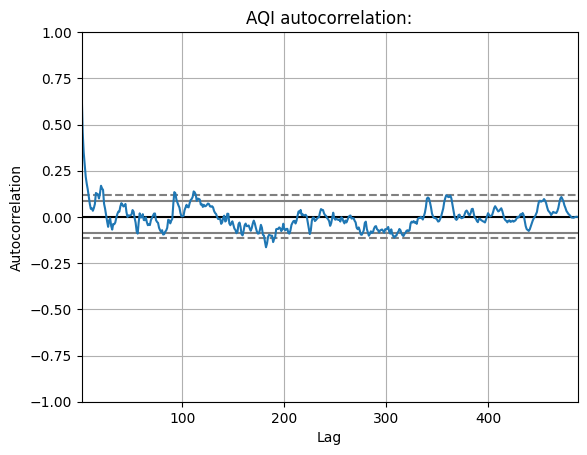

In [ ]:
pd.plotting.autocorrelation_plot(df_wuhan['AQI'])
plt.title('AQI autocorrelation of Wuhan Data set:')
plt.show()

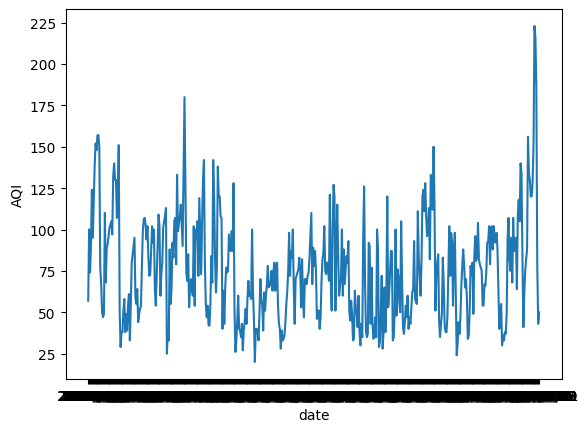

In [ ]:
sns.lineplot(x=df_wuhan['date'],y=df_wuhan['AQI'],data=df_wuhan)
plt.show()

<ipython-input-14-c139454c6e5d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_wuhan.corr(),annot=True)


<Axes: >

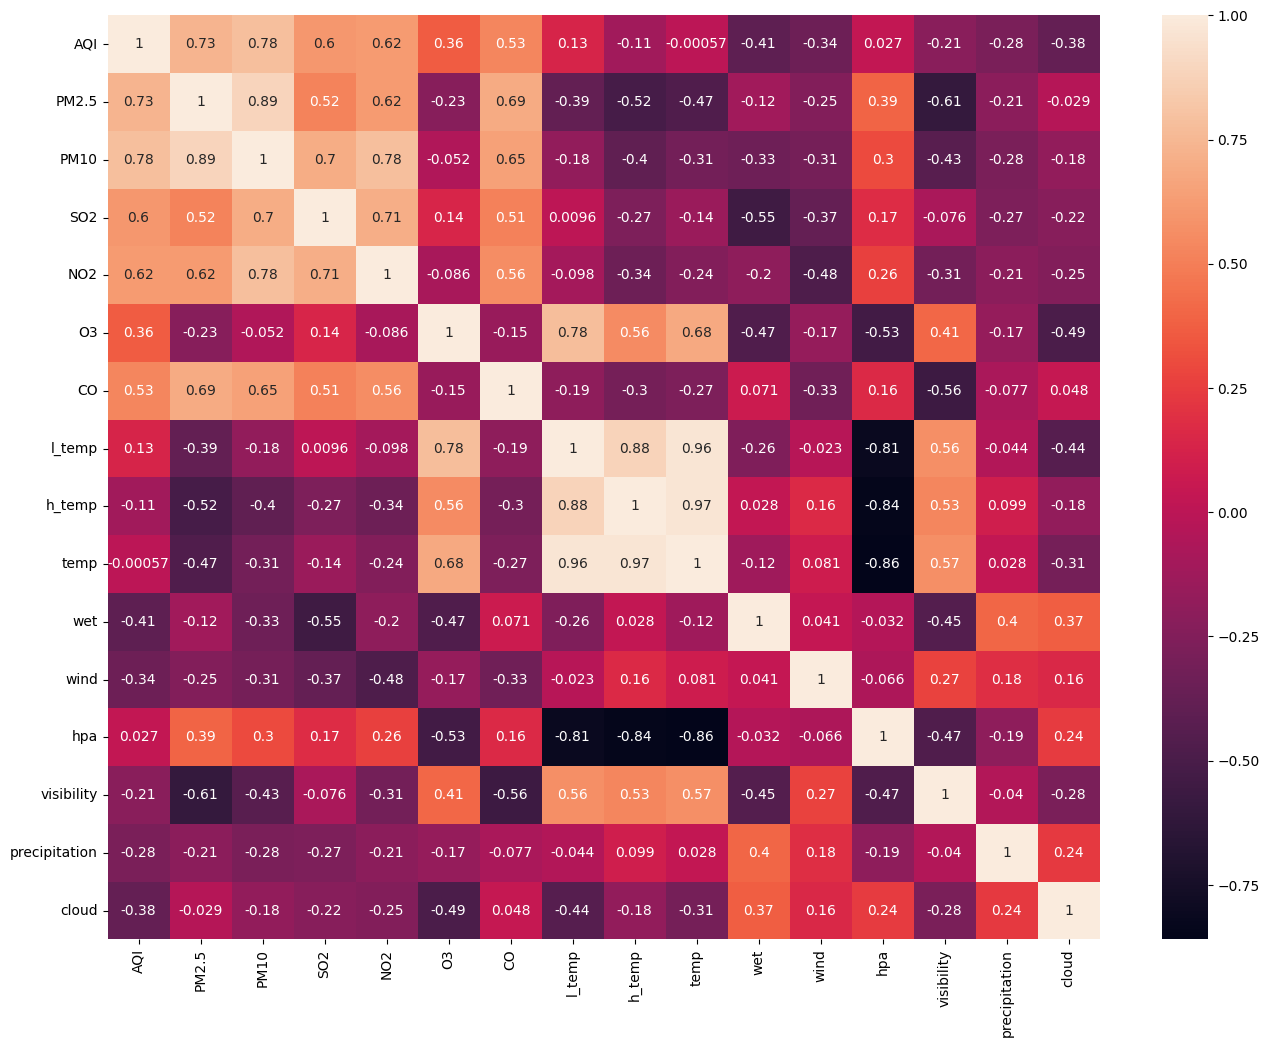

In [ ]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df_wuhan.corr(),annot=True)

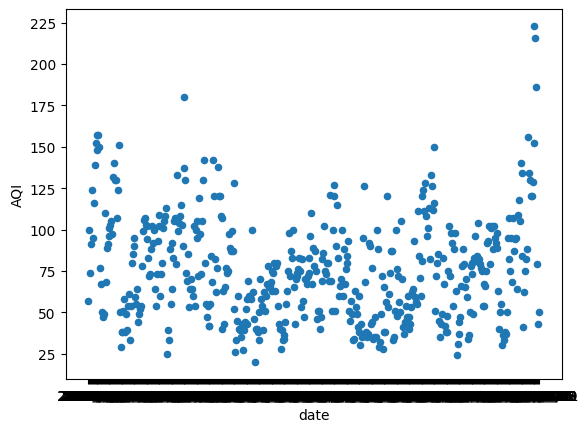

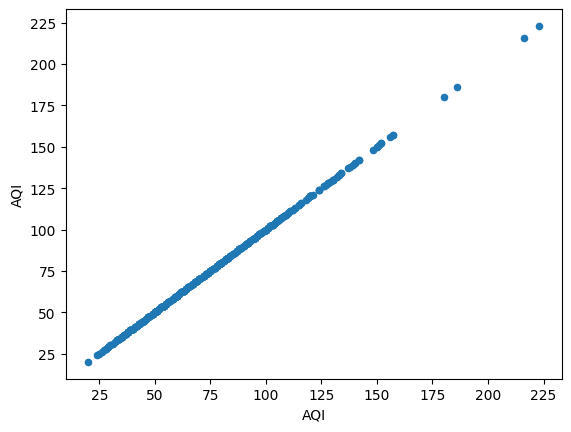

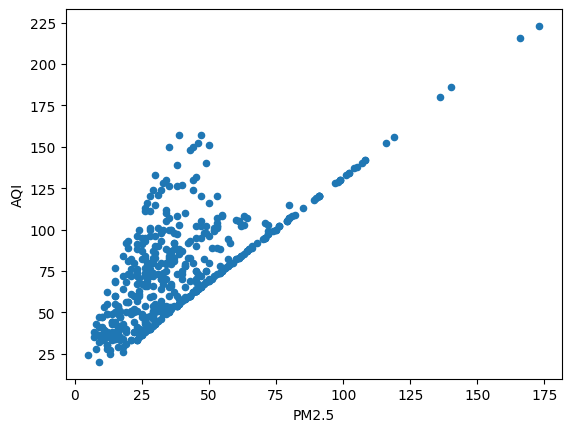

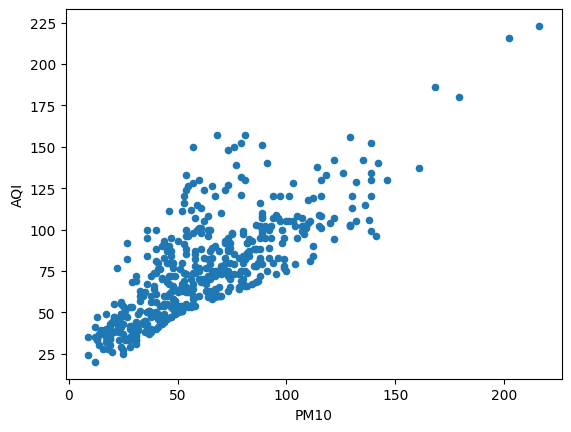

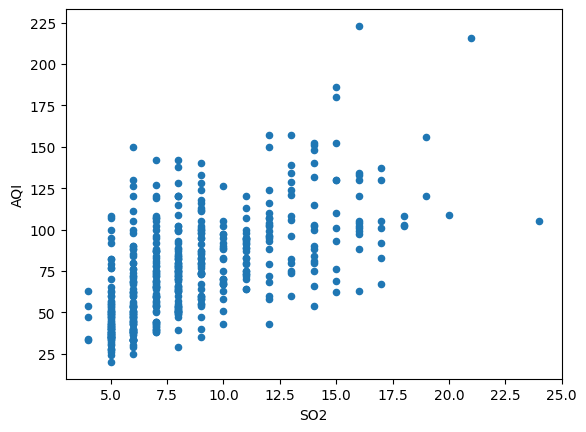

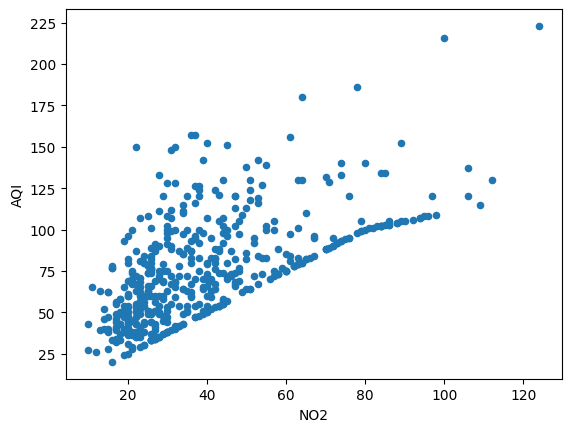

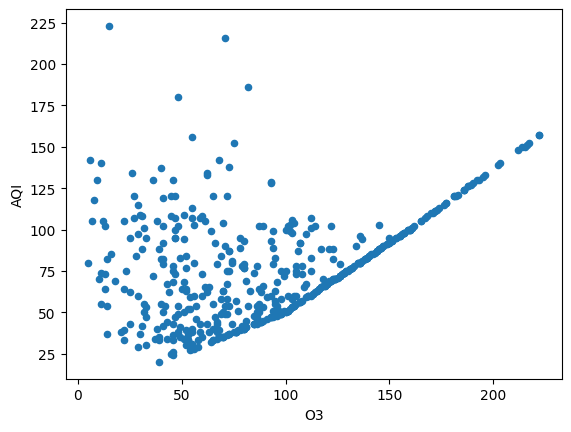

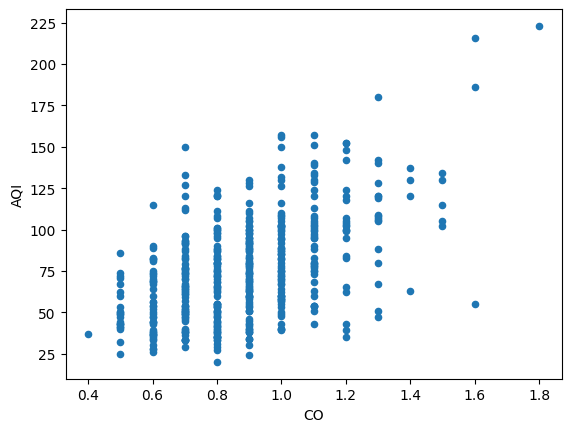

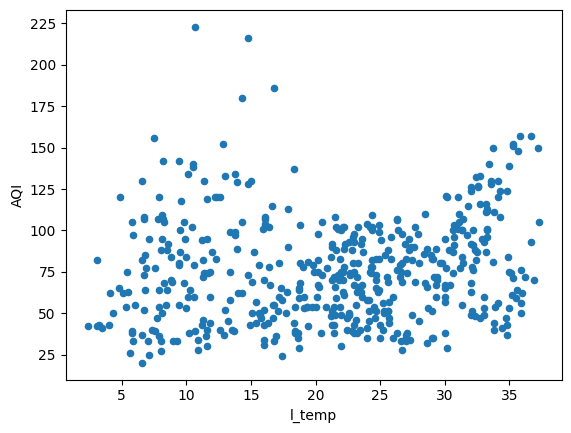

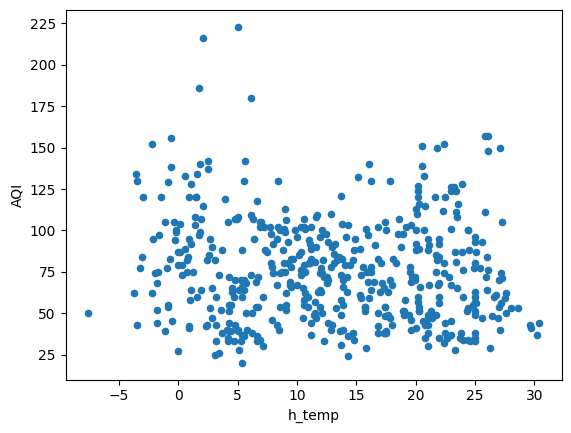

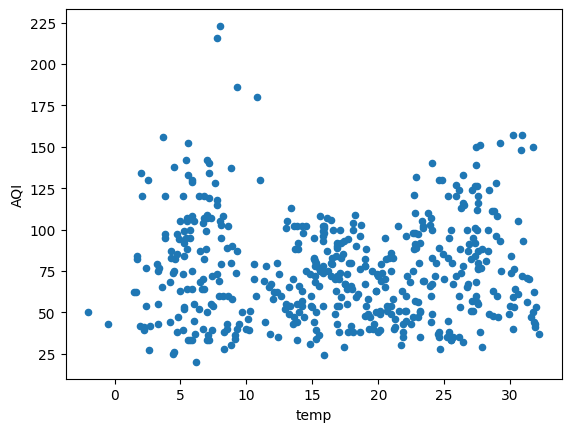

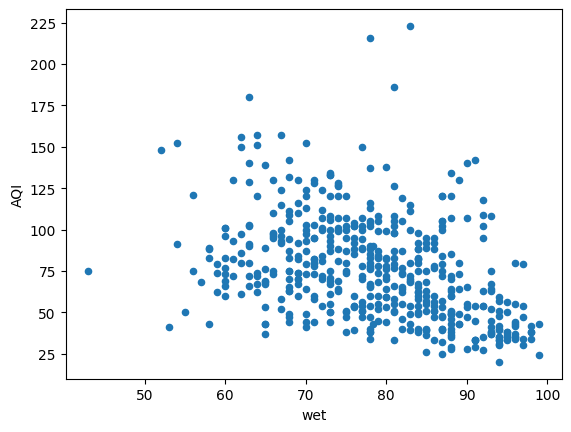

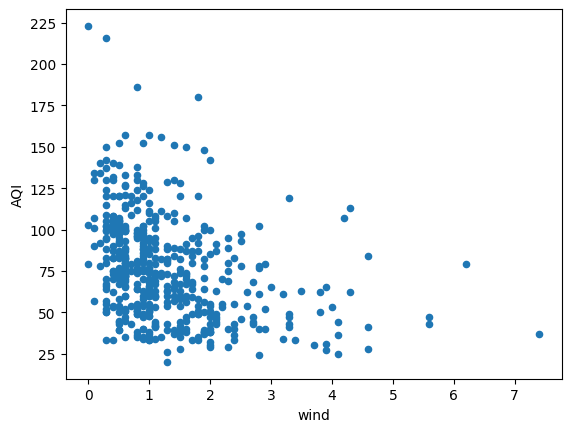

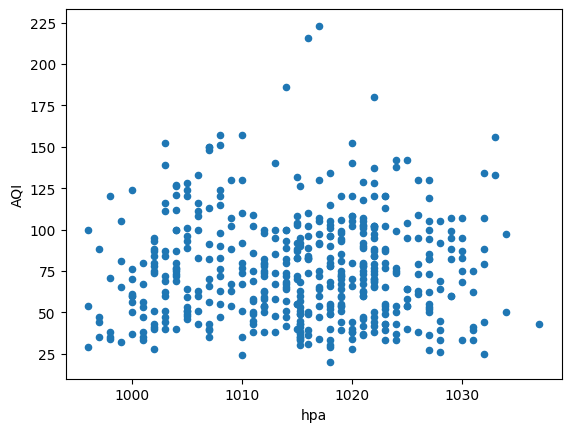

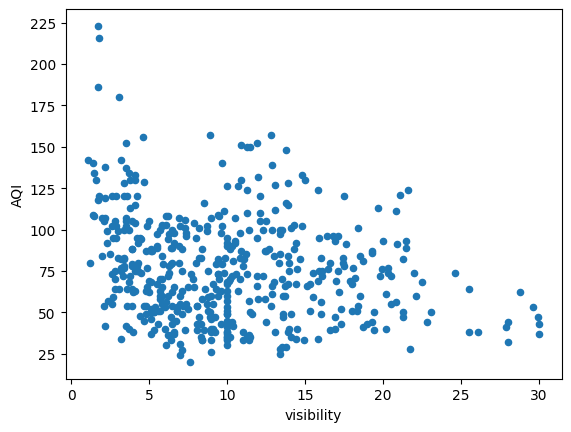

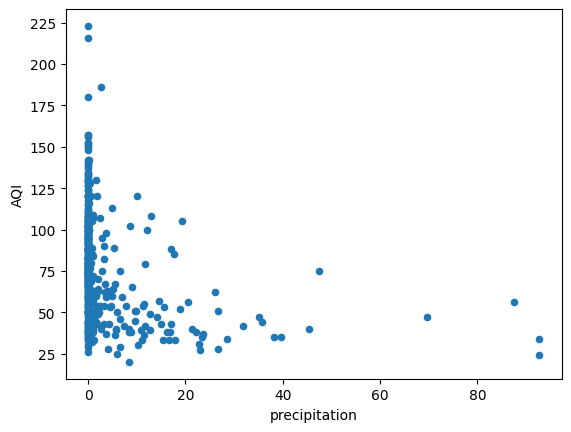

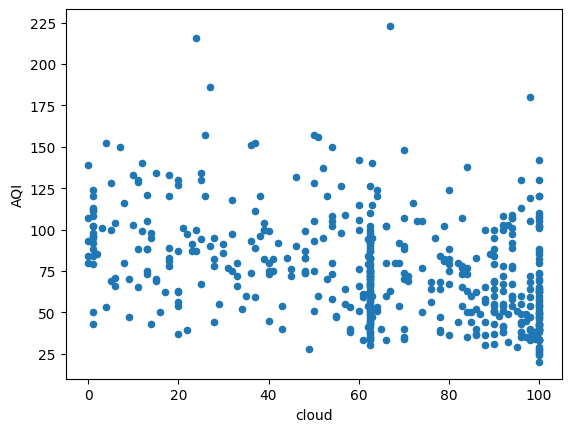

In [ ]:
for i in df_wuhan.columns:
    df_wuhan.plot(kind='scatter',x=i,y='AQI')

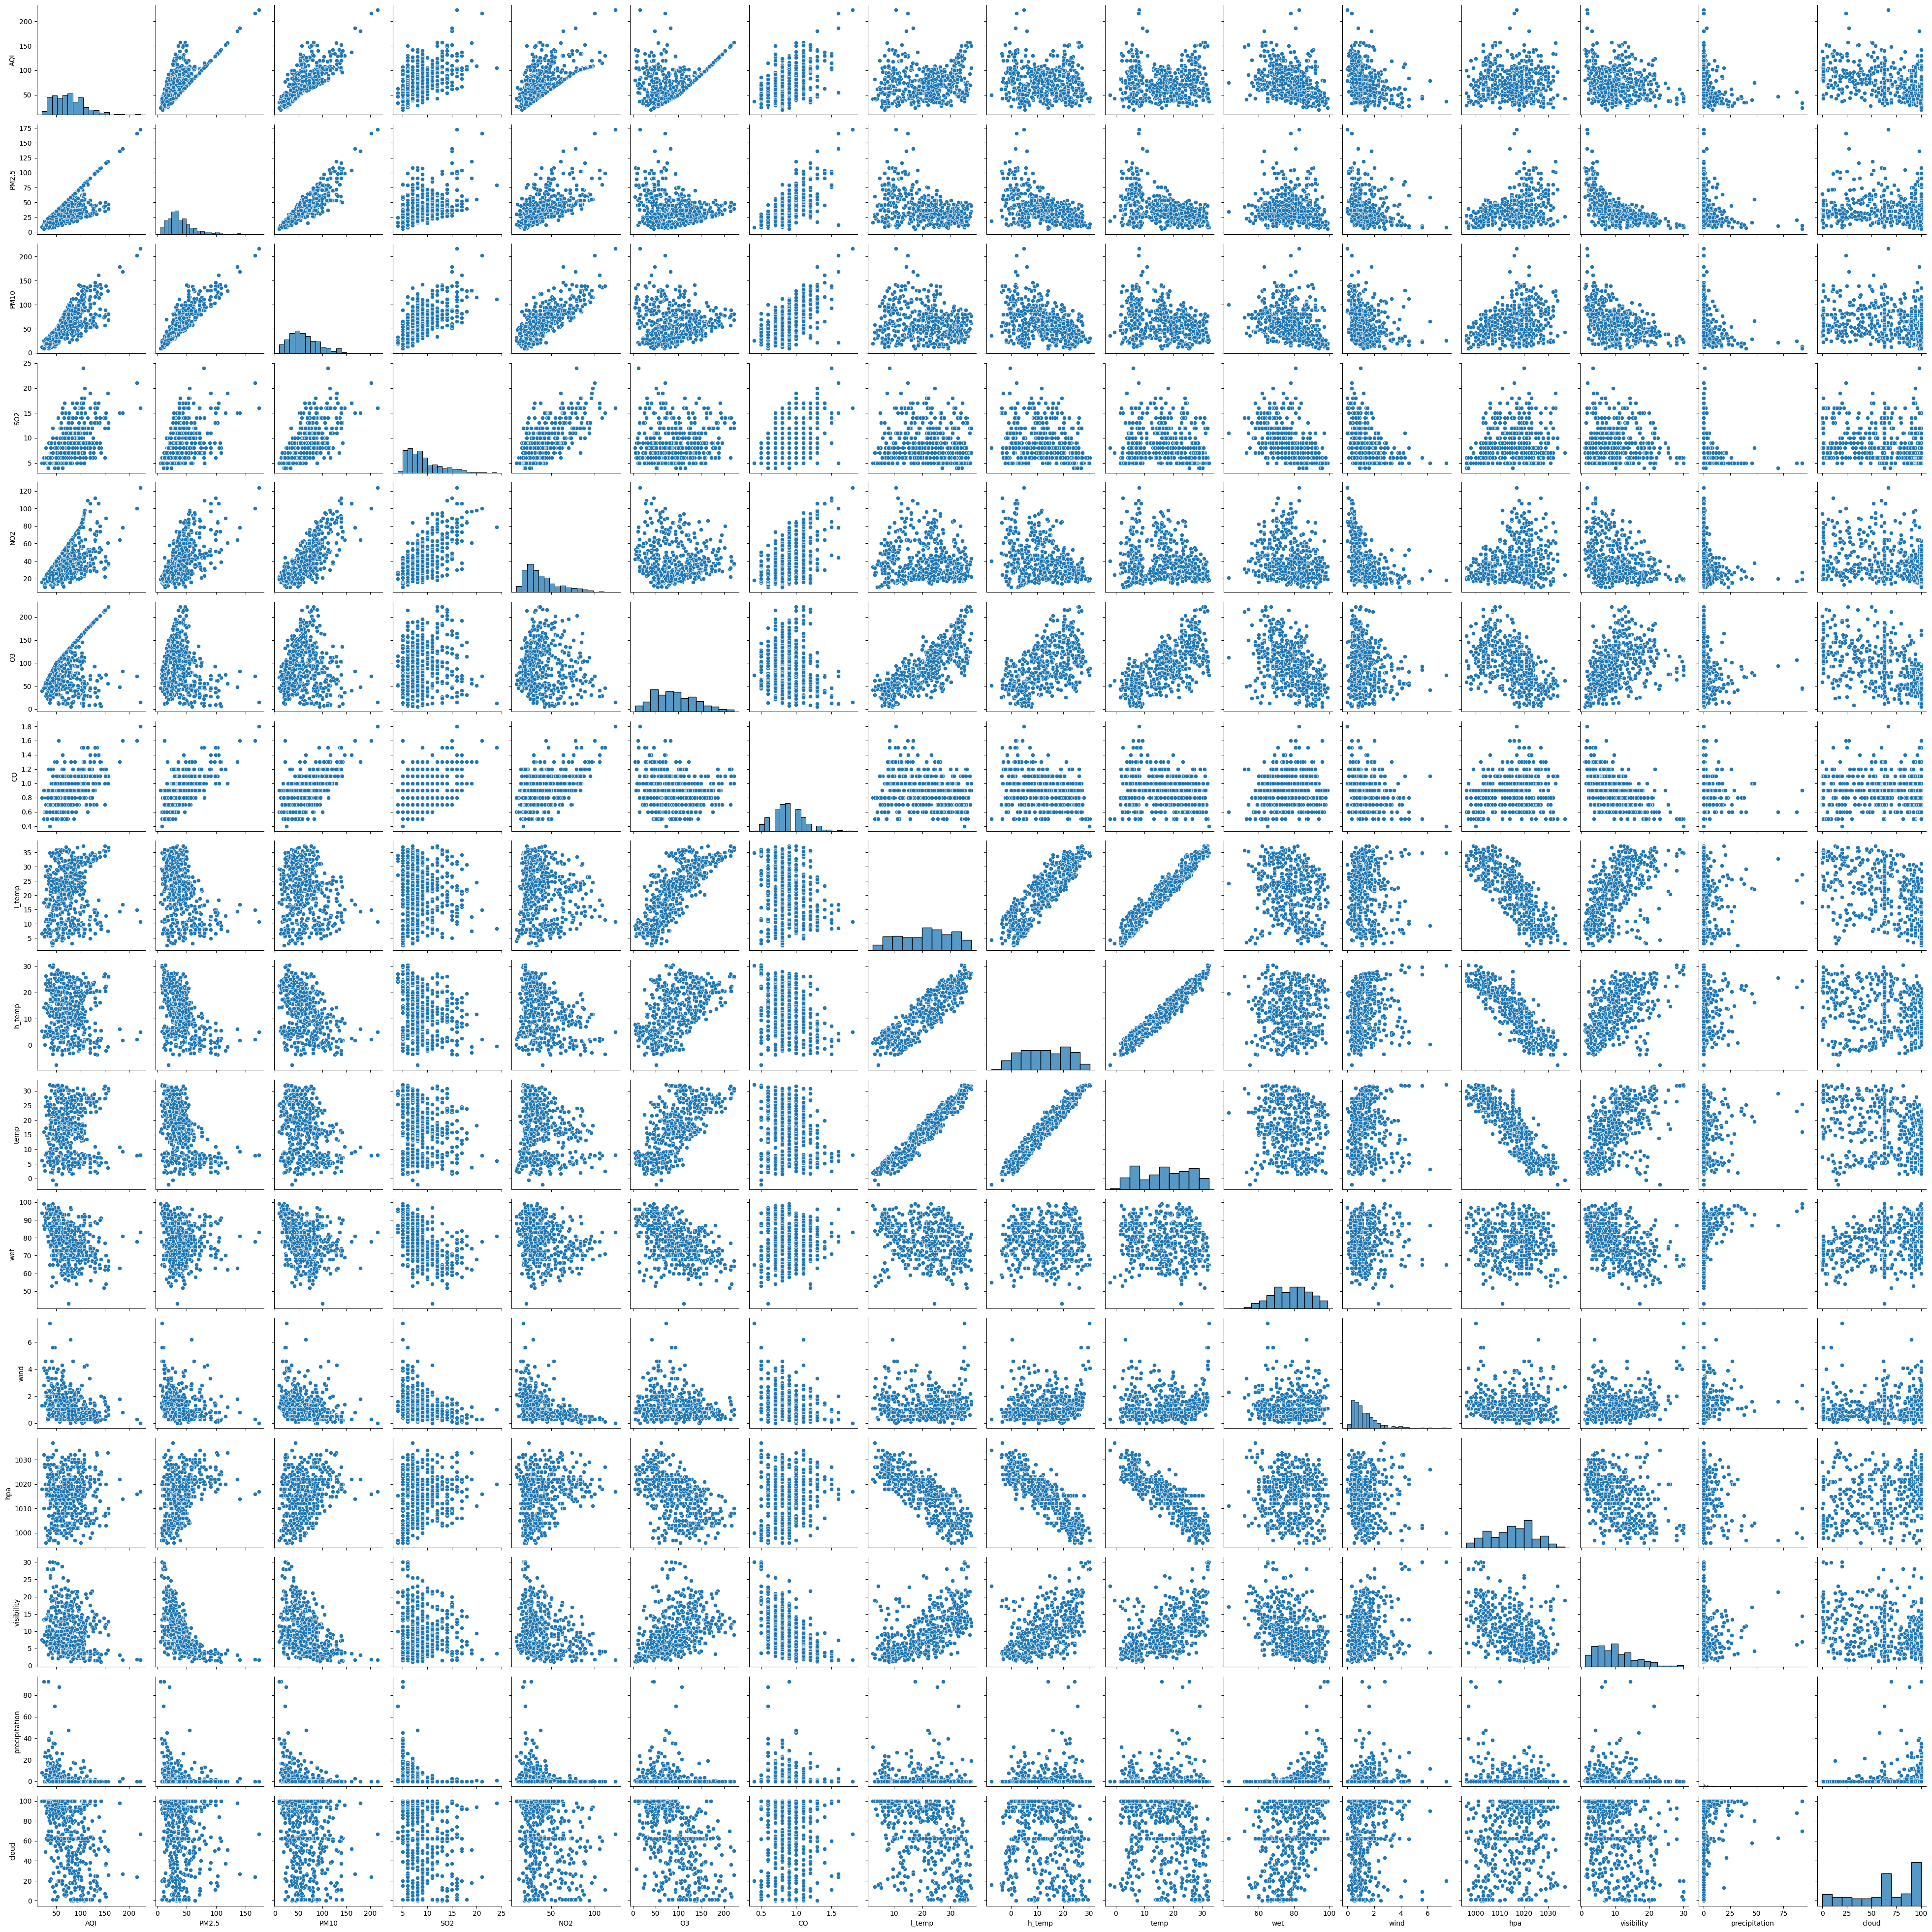

In [ ]:
sns.pairplot(df_wuhan)
plt.show()

In [ ]:
for i in df_wuhan.columns:
   df_wuhan.boxplot(column='AQI',by=i,figsize=(10,6))

In [ ]:
sns.displot(df_wuhan, x="AQI", kind="kde")

In [ ]:
Y_train=df_wuhan["AQI"].values
X_train=df_wuhan.drop(["AQI","date"],axis=1).values

In [ ]:
Y_train

In [ ]:
X_train

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


Swarm optimsation

In [ ]:
# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    fold = opts['fold']
    xt = fold['xt']
    yt = fold['yt']
    xv = fold['xv']
    yv = fold['yv']
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain = xt[:, x == 1]
    ytrain = yt.reshape(num_train)
    xvalid = xv[:, x == 1]
    yvalid = yv.reshape(num_valid)
    # Training
    mdl     = LinearRegression()
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    error   = mean_squared_error(yvalid, ypred, squared=False)
    
    return error

In [ ]:
def Fun(xtrain, ytrain, x, opts):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    # original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost = alpha * error + beta * (num_feat / max_feat)
        
    return cost

In [ ]:
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X

In [ ]:
def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin

In [ ]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin

In [ ]:
def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x

In [ ]:
def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data   

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train, Y_train, test_size=0.3, shuffle=True)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [ ]:
c1  = 2         # cognitive factor
c2  = 2         # social factor 
w   = 0.9       # inertia weight
k     = 5     # k-value in KNN
N     = 20    # number of population
T     = 100   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

In [ ]:
fmdl  = jfs(X_train, Y_train, opts)
sf    = fmdl['sf']
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = LinearRegression()
mdl.fit(x_train, y_train)
y_pred    = mdl.predict(x_valid)
RMSE       = mean_squared_error(y_valid, y_pred, squared=False)
print("RMSE:", RMSE)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0
fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [ ]:
fmdl['sf']

Preparing for training model

In [ ]:
df_wuhan.head()

In [ ]:
df_wuhan=df_wuhan.drop(['date'],axis=1)
df_wuhan

In [ ]:
df_wuhan.info()

In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
total_dataset = len(df_wuhan)
df_train = df_wuhan[:int(total_dataset*0.76)]
df_test = df_wuhan[int(total_dataset*0.76):total_dataset]

# scaled
scaler = MinMaxScaler()
df_wuhan_train_scaled = scaler.fit_transform(df_train)
df_wuhan_test_scaled = scaler.fit_transform(df_test)

print('Data for train:', df_train.shape)
print('\nData for test:', df_test.shape)

print(df_wuhan_train_scaled)
print(df_wuhan_test_scaled)

In [ ]:
n_steps_in, n_steps_out = 5, 3

# Convert into input/output
x_train, y_train = split_sequences(df_wuhan_train_scaled, n_steps_in, n_steps_out)
x_test, y_test = split_sequences(df_wuhan_test_scaled, n_steps_in, n_steps_out)
n_features = x_train.shape[2]
# The dataset knows the number of features, e.g. 2
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_train)

Training this data with LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))


In [ ]:
# fit model
epoch = 50

model.compile(optimizer='adam', loss='mse', 
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))

In [ ]:
model.summary()

Fitting the model

In [ ]:
predictions = model.predict_generator(x_test)
print(predictions.shape)
print(y_test.shape)

<ipython-input-43-cb2bd3e4ae3a>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(x_test)


(111, 3, 16)
(111, 3, 16)


In [ ]:
predictions

array([[[0.5180376 , 0.22305602, 0.31466395, ..., 0.5025892 ,
         0.07196826, 0.33523908],
        [0.47926107, 0.17915992, 0.30482364, ..., 0.50990564,
         0.04371084, 0.3419254 ],
        [0.46335465, 0.17398246, 0.29287797, ..., 0.5050219 ,
         0.03756528, 0.35300747]],

       [[0.3014058 , 0.14703962, 0.17989813, ..., 0.5495354 ,
         0.07940997, 0.42551377],
        [0.31103367, 0.13816148, 0.20088008, ..., 0.5582106 ,
         0.03273516, 0.37334374],
        [0.31691632, 0.13800551, 0.20465669, ..., 0.57016104,
         0.01848198, 0.3653092 ]],

       [[0.31716773, 0.14610781, 0.20387863, ..., 0.601725  ,
         0.04556111, 0.26371944],
        [0.29295257, 0.1294805 , 0.20102687, ..., 0.64601016,
         0.0290719 , 0.24388988],
        [0.28607526, 0.1254594 , 0.1975018 , ..., 0.6646022 ,
         0.02448594, 0.24312887]],

       ...,

       [[0.568867  , 0.51788265, 0.6324282 , ..., 0.06775028,
         0.04796194, 0.8898386 ],
        [0.40408415, 

In [ ]:
predictions = np.reshape(predictions, (y_test.shape[0]*y_test.shape[1], y_test.shape[2]))
real = np.reshape(y_test, (y_test.shape[0]*y_test.shape[1], y_test.shape[2]))

# rescale predictions
predictions = pd.DataFrame(predictions)
predictions = scaler.inverse_transform(predictions)
predictions = pd.DataFrame(predictions)

real = pd.DataFrame(real)
real = scaler.inverse_transform(real)
real = pd.DataFrame(real)

print(predictions.shape)
print(real.shape)

(333, 16)
(333, 16)


In [ ]:
predictions

0          1           2         3          4           5   \
0    127.089485  42.473412   74.135437  8.464870  41.781647  169.398270   
1    119.372948  35.098869   72.098488  7.850157  36.849487  161.120071   
2    116.207581  34.229053   69.625740  7.647010  36.554924  161.540634   
3     83.979752  29.702658   46.238914  6.916342  36.084423  130.263229   
4     85.895699  28.211130   50.582176  7.155236  36.905827  137.000687   
..          ...        ...         ...       ...        ...         ...   
328  105.241463  58.590366   80.947136  7.515735  34.640415   49.736217   
329   94.797844  51.107903   68.374886  7.263479  33.768349   45.837440   
330  126.577888  77.734131  107.725906  9.027056  43.407436   70.977699   
331  100.431923  53.914597   70.847168  7.642728  30.799522   60.913651   
332   92.067940  46.979328   59.431793  7.480890  30.220692   58.056446   

           6          7          8          9          10        11  \
0    1.033643  35.345451  22.455900  29.947975  81.243172  1.194556   
1    0.957670  33.765007  21.554289  28.902946  81.985184  1.356992   
2    0.924968  33.252491  21.414062  28.352409  82.408020  1.349334   
3    0.860312  30.796980  19.553358  25.662794  86.359680  1.367715   
4    0.860800  30.946283  19.071266  25.826387  84.617477  1.344857   
..        ...        ...        ...        ...        ...       ...   
328  1.216973  12.102142   3.676648   6.579645  82.754349  1.634646   
329  1.117956  10.801628   2.607164   5.653518  83.149796  1.714503   
330  1.323091  15.934417   3.920392   9.372429  82.783409  1.347749   
331  1.142147  12.774538   3.199865   7.045633  81.958908  1.606447   
332  1.052469  11.688683   2.377491   6.289835  82.177231  1.680507   

              12         13        14          15  
0    1006.057678  12.306186  6.664261   34.188671  
1    1007.433960  12.464952  4.047624   34.850616  
2    1007.874207  12.358975  3.478545   35.947739  
3    1006.810303  13.324918  7.353364   43.125866  
4    1006.132812  13.513170  3.031276   37.961029  
..           ...        ...       ...         ...  
328  1020.495056   4.571017  8.131225  101.701813  
329  1021.704041   5.046292  8.799406  103.985840  
330  1016.497620   4.002820  8.024980   87.994080  
331  1018.868103   5.422982  8.618554   98.325005  
332  1020.001282   6.119676  8.900577  100.501991  

[333 rows x 16 columns]

In [ ]:
real

0     1     2    3     4      5    6     7     8     9     10   11  \
0    51.0  22.0  33.0  5.0  25.0  101.0  0.7  25.6  20.3  21.6  94.0  1.8   
1    72.0  26.0  38.0  6.0  22.0  126.0  0.7  29.4  19.7  24.3  80.0  1.6   
2    80.0  28.0  48.0  8.0  26.0  135.0  0.8  29.8  22.4  25.6  71.0  1.7   
3    72.0  26.0  38.0  6.0  22.0  126.0  0.7  29.4  19.7  24.3  80.0  1.6   
4    80.0  28.0  48.0  8.0  26.0  135.0  0.8  29.8  22.4  25.6  71.0  1.7   
..    ...   ...   ...  ...   ...    ...  ...   ...   ...   ...   ...  ...   
328  79.0  58.0  65.0  5.0  29.0   41.0  1.1   9.4   0.3   3.2  87.0  6.2   
329  43.0  26.0  43.0  7.0  24.0   62.0  0.5   3.2  -3.5  -0.5  58.0  2.7   
330  79.0  58.0  65.0  5.0  29.0   41.0  1.1   9.4   0.3   3.2  87.0  6.2   
331  43.0  26.0  43.0  7.0  24.0   62.0  0.5   3.2  -3.5  -0.5  58.0  2.7   
332  50.0  19.0  36.0  8.0  40.0   51.0  0.5   4.3  -7.6  -2.0  55.0  0.3   

         12    13    14    15  
0    1005.0   8.8  26.6  90.0  
1    1008.0  10.3   0.1  33.0  
2    1012.0  16.6   0.0  69.0  
3    1008.0  10.3   0.1  33.0  
4    1012.0  16.6   0.0  69.0  
..      ...   ...   ...   ...  
328  1026.0   3.9  11.7  90.0  
329  1037.0  19.0   0.0  14.0  
330  1026.0   3.9  11.7  90.0  
331  1037.0  19.0   0.0  14.0  
332  1034.0  23.1   0.0  16.0  

[333 rows x 16 columns]

In [ ]:
df_final = pd.DataFrame()

In [ ]:
df_final['aqi'] = real[0]
df_final['pm10'] = real[1]
df_final['pm25'] = real[2]
df_final['o3'] = real[3]
df_final['so2'] = real[4]
df_final['no2'] = real[5]
df_final['co'] = real[6]

df_final['aqi_pred'] = predictions[0]
df_final['pm10_pred'] = predictions[1]
df_final['pm25_pred'] = predictions[2]
df_final['o3_pred'] = predictions[3]
df_final['so2_pred'] = predictions[4]
df_final['no2_pred'] = predictions[5]
df_final['co_pred'] = predictions[6]

In [ ]:
df_final

aqi  pm10  pm25   o3   so2    no2   co    aqi_pred  pm10_pred  \
0    51.0  22.0  33.0  5.0  25.0  101.0  0.7  127.089485  42.473412   
1    72.0  26.0  38.0  6.0  22.0  126.0  0.7  119.372948  35.098869   
2    80.0  28.0  48.0  8.0  26.0  135.0  0.8  116.207581  34.229053   
3    72.0  26.0  38.0  6.0  22.0  126.0  0.7   83.979752  29.702658   
4    80.0  28.0  48.0  8.0  26.0  135.0  0.8   85.895699  28.211130   
..    ...   ...   ...  ...   ...    ...  ...         ...        ...   
328  79.0  58.0  65.0  5.0  29.0   41.0  1.1  105.241463  58.590366   
329  43.0  26.0  43.0  7.0  24.0   62.0  0.5   94.797844  51.107903   
330  79.0  58.0  65.0  5.0  29.0   41.0  1.1  126.577888  77.734131   
331  43.0  26.0  43.0  7.0  24.0   62.0  0.5  100.431923  53.914597   
332  50.0  19.0  36.0  8.0  40.0   51.0  0.5   92.067940  46.979328   

      pm25_pred   o3_pred   so2_pred    no2_pred   co_pred  
0     74.135437  8.464870  41.781647  169.398270  1.033643  
1     72.098488  7.850157  36.849487  161.120071  0.957670  
2     69.625740  7.647010  36.554924  161.540634  0.924968  
3     46.238914  6.916342  36.084423  130.263229  0.860312  
4     50.582176  7.155236  36.905827  137.000687  0.860800  
..          ...       ...        ...         ...       ...  
328   80.947136  7.515735  34.640415   49.736217  1.216973  
329   68.374886  7.263479  33.768349   45.837440  1.117956  
330  107.725906  9.027056  43.407436   70.977699  1.323091  
331   70.847168  7.642728  30.799522   60.913651  1.142147  
332   59.431793  7.480890  30.220692   58.056446  1.052469  

[333 rows x 14 columns]

<Axes: >

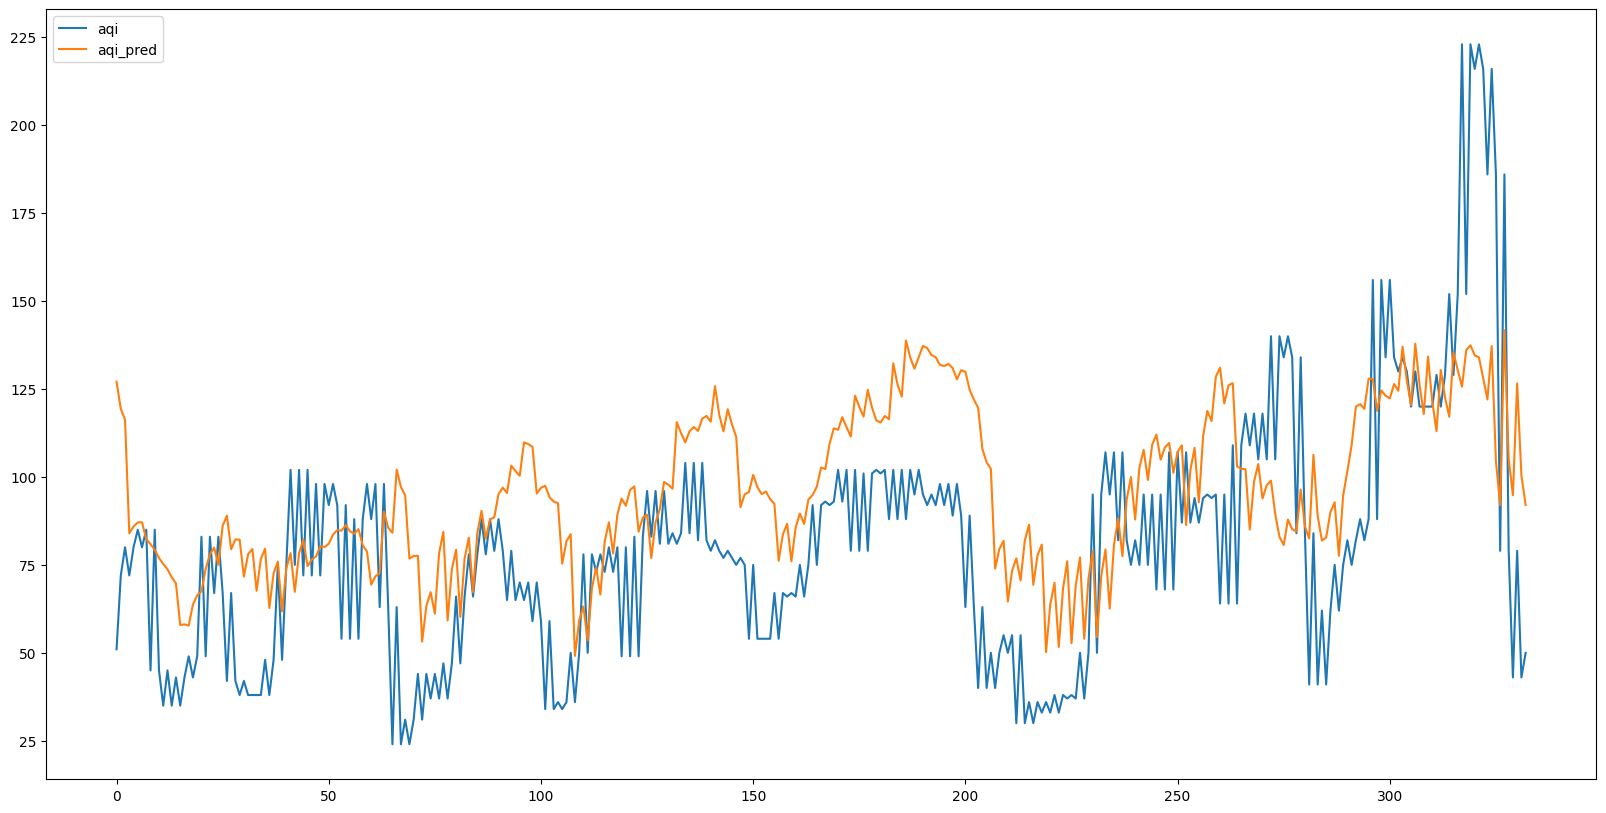

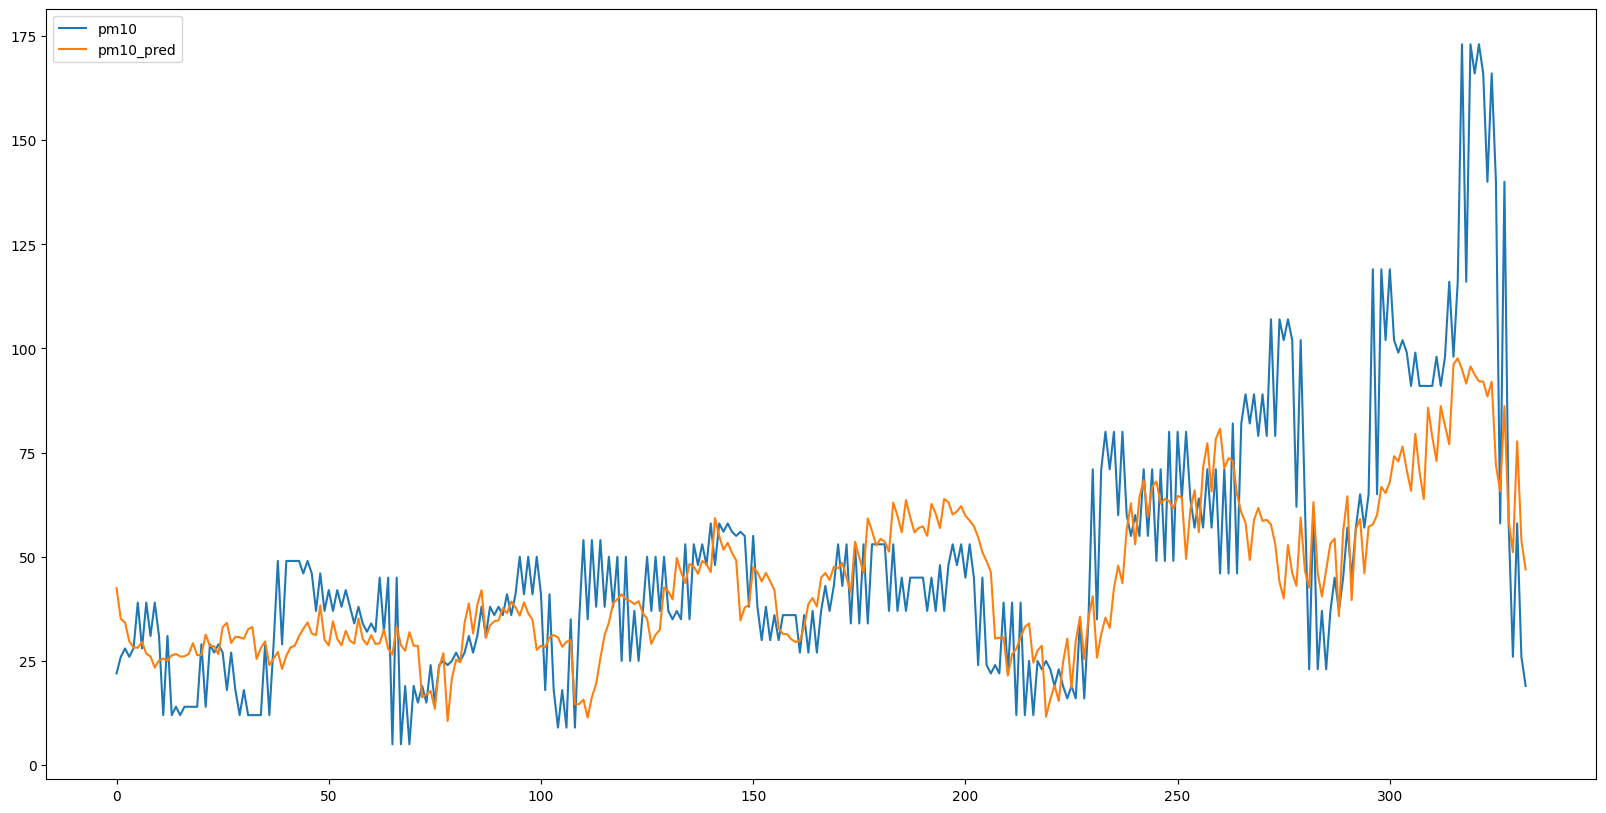

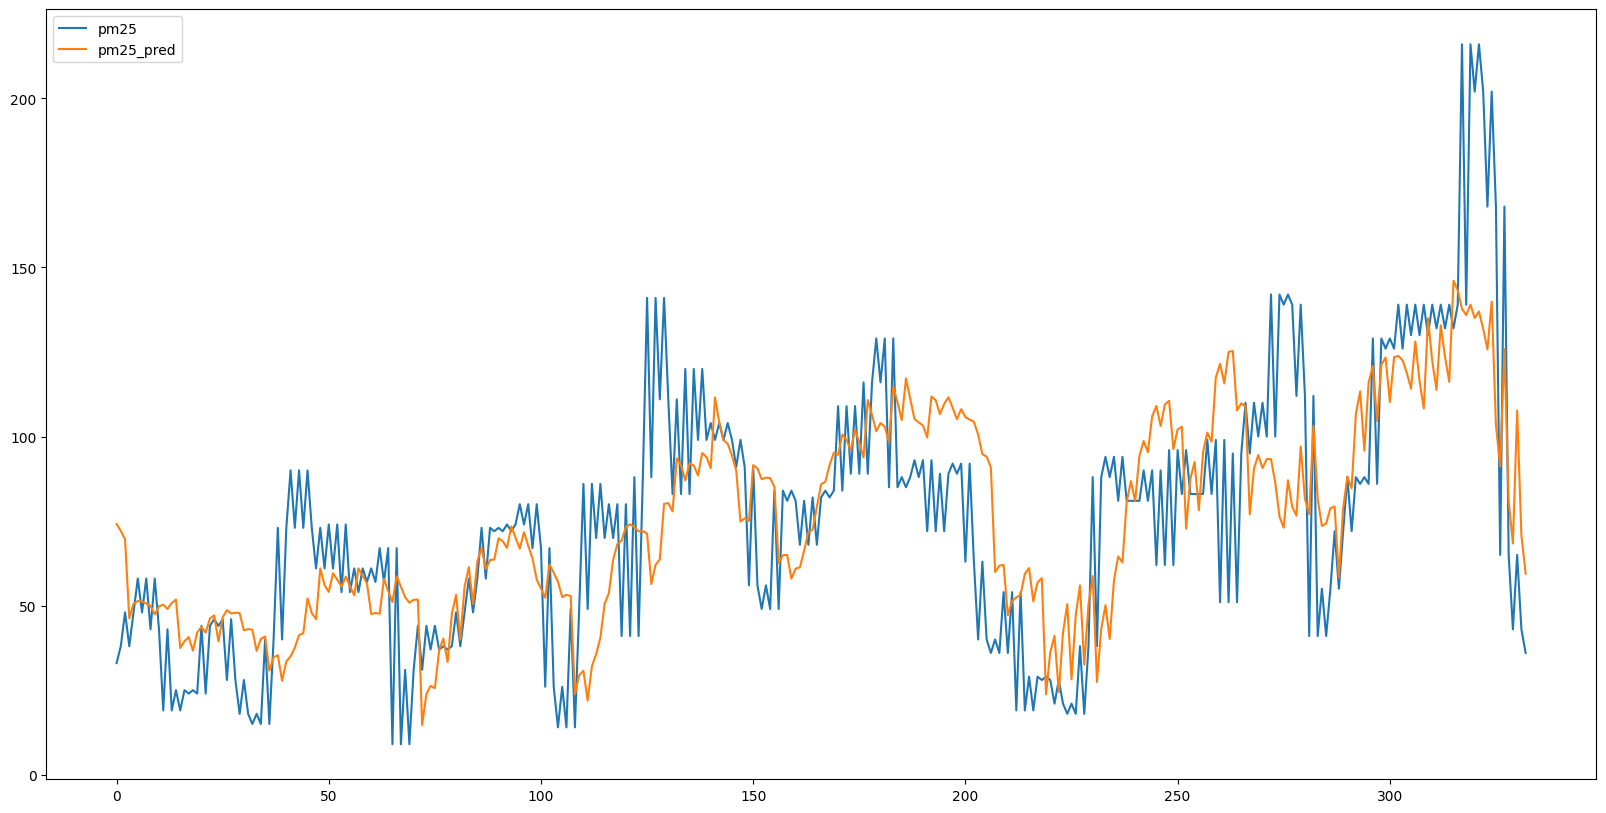

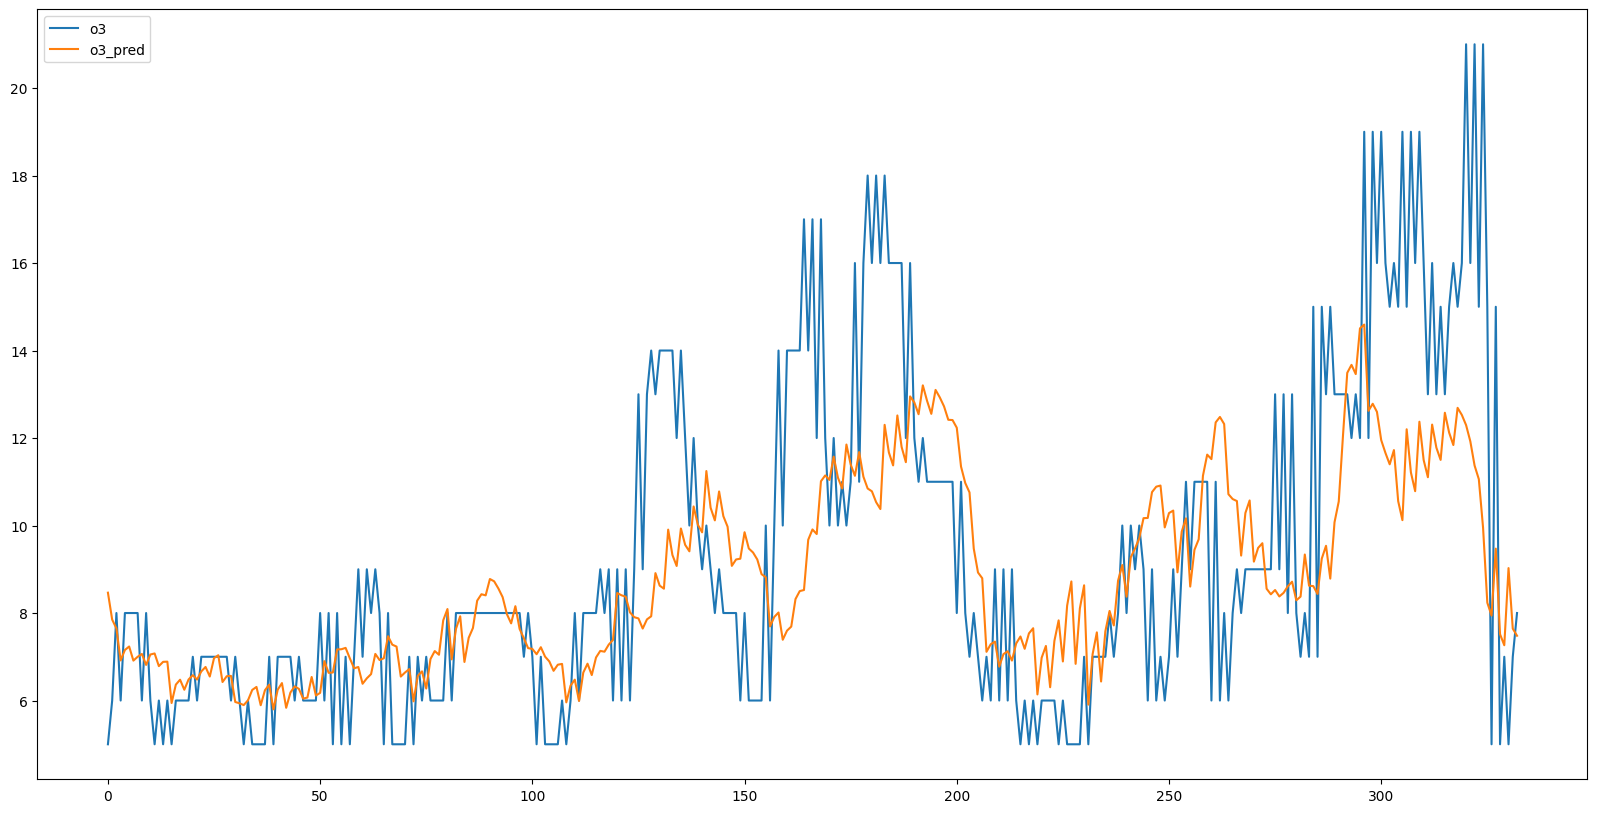

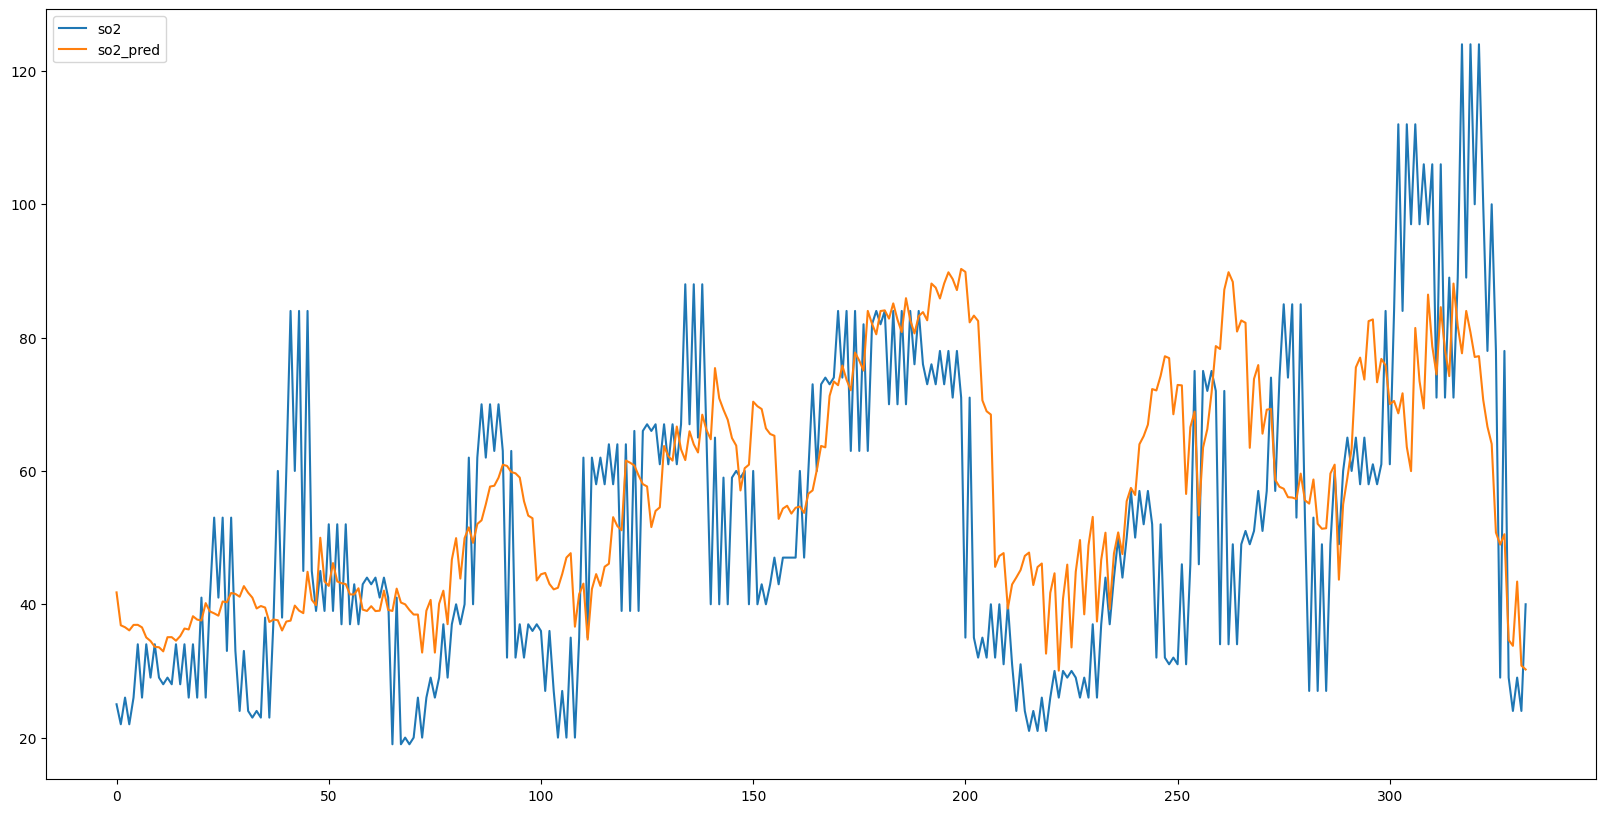

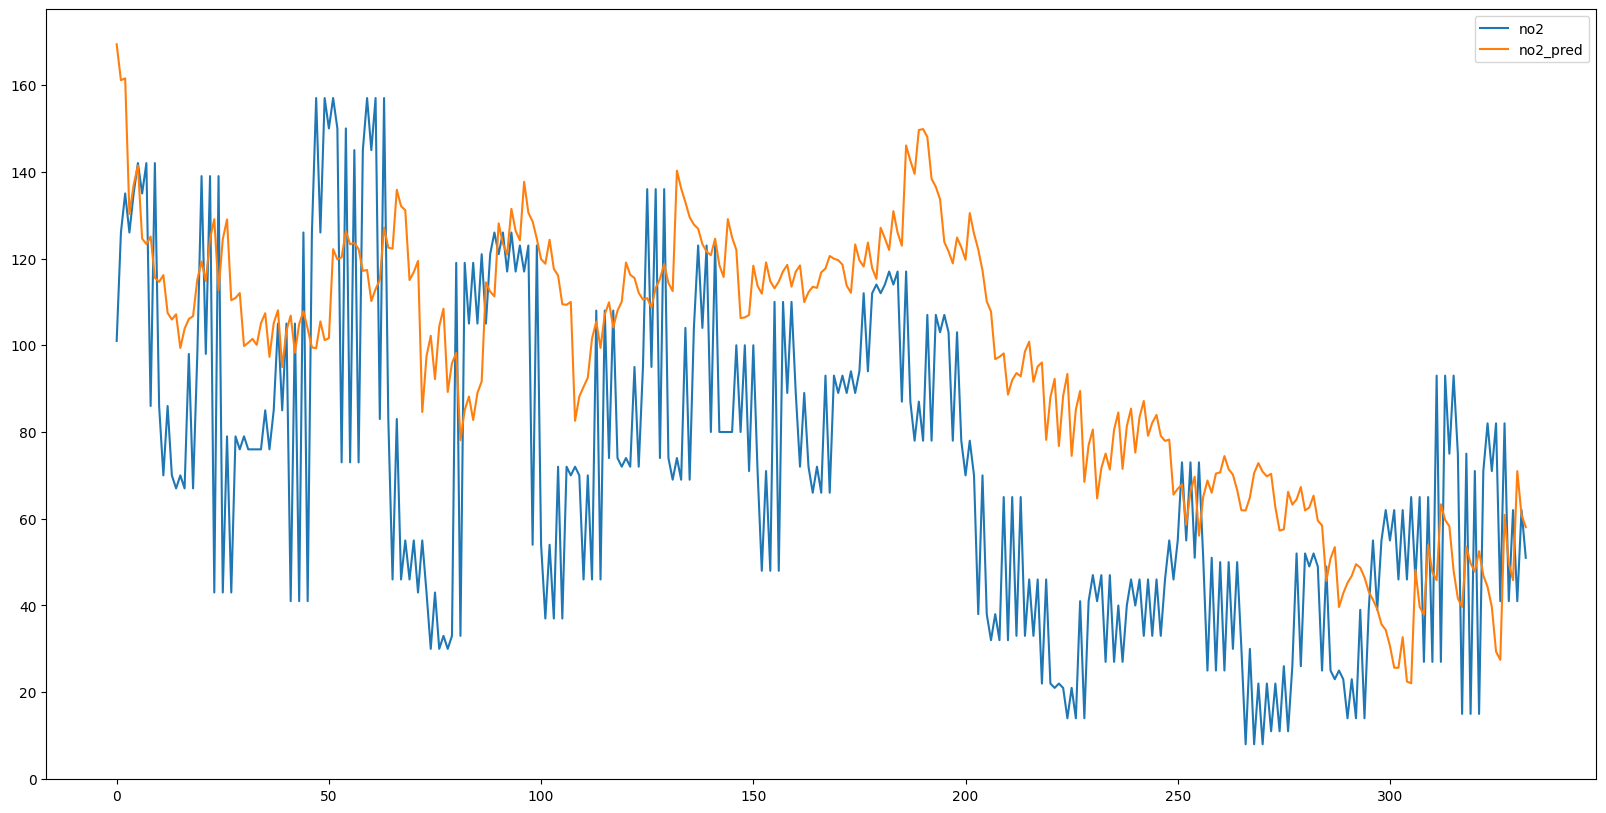

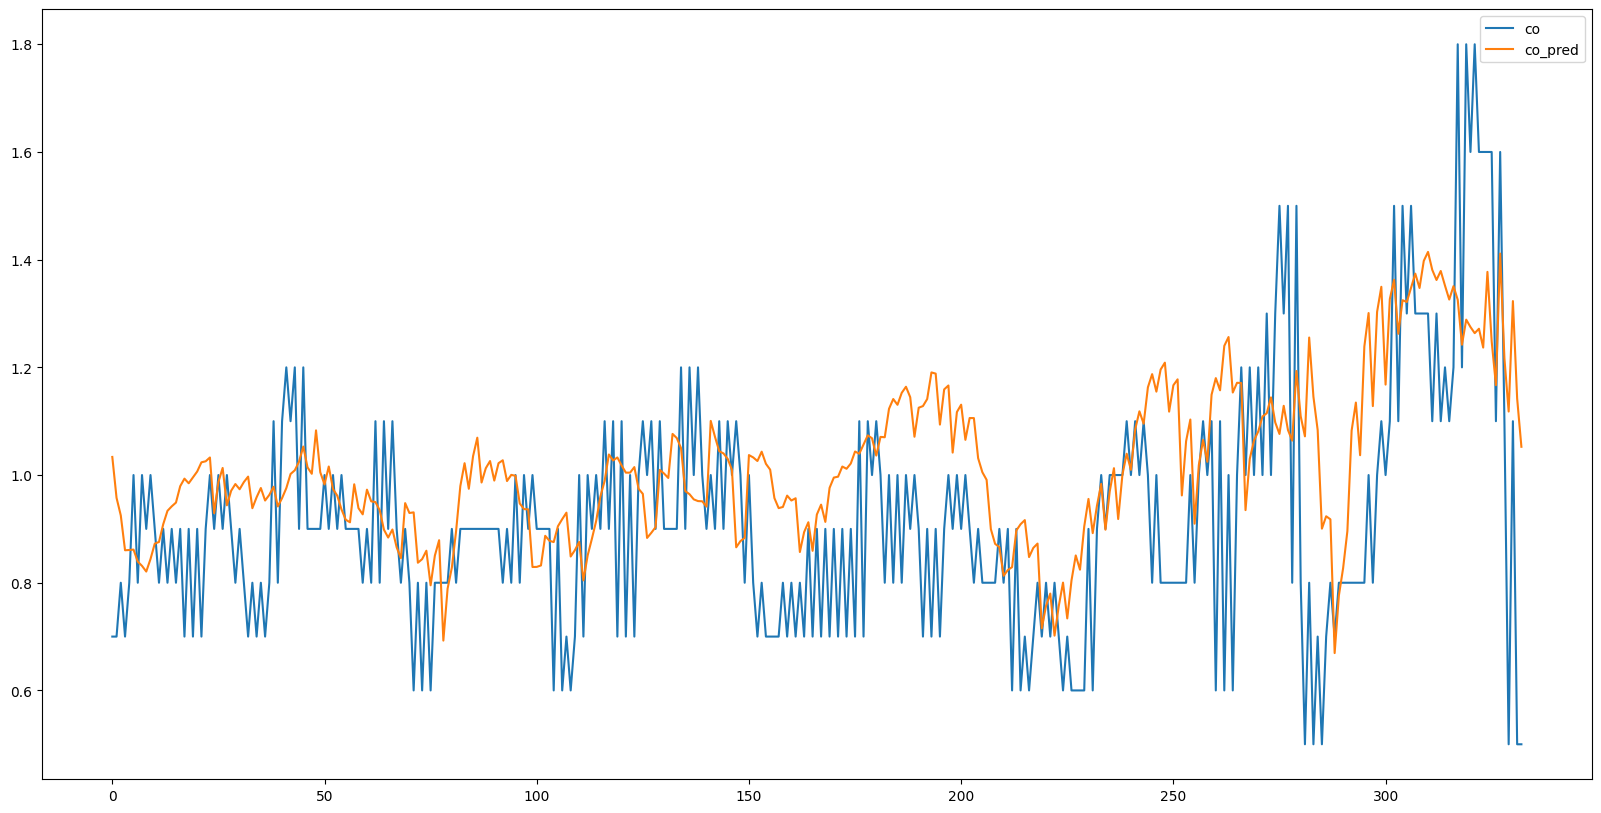

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rcParams['axes.grid'] = False
df_final[['aqi', 'aqi_pred']].plot()
df_final[['pm10', 'pm10_pred']].plot()
df_final[['pm25', 'pm25_pred']].plot()
df_final[['o3', 'o3_pred']].plot()
df_final[['so2', 'so2_pred']].plot()
df_final[['no2', 'no2_pred']].plot()
df_final[['co', 'co_pred']].plot()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

indicator = ['aqi', 'pm10', 'pm25', 'o3', 'so2', 'no2', 'co']
#print(f'n_step_in: {n_steps_in}, n_steps_out: {n_steps_out}, Epochs: {epoch}\n\n')
for i in indicator:
  rmse = mean_squared_error(df_final[f'{i}'],df_final[f'{i}_pred'], squared=False)
  mse = mean_squared_error(df_final[f'{i}'],df_final[f'{i}_pred'])
  mae = mean_absolute_error(df_final[f'{i}'], df_final[f'{i}_pred'])
  mape = mean_absolute_percentage_error(df_final[f'{i}'], df_final[f'{i}_pred'])
  print(f'{i} ----> RMSE: {rmse} ; MSE: {mse} ; MAE: {mae} ; MAPE: {mape}')

aqi ----> RMSE: 32.51514787205413 ; MSE: 1057.2348411415462 ; MAE: 26.81455314338386 ; MAPE: 0.4385004946024067
pm10 ----> RMSE: 20.726005748328415 ; MSE: 429.56731427974245 ; MAE: 14.575632040923065 ; MAPE: 0.39060453101429204
pm25 ----> RMSE: 26.84329254763625 ; MSE: 720.5623547979839 ; MAE: 20.586633404453952 ; MAPE: 0.4115767477034228
o3 ----> RMSE: 2.8729615799287203 ; MSE: 8.253908239746528 ; MAE: 2.082658666032213 ; MAPE: 0.21805396570583263
so2 ----> RMSE: 18.214221018818993 ; MSE: 331.75784732238765 ; MAE: 14.106783044946802 ; MAPE: 0.3376730744840434
no2 ----> RMSE: 40.17179669546228 ; MSE: 1613.7732497415539 ; MAE: 34.43776650185342 ; MAPE: 0.838216516686348
co ----> RMSE: 0.21300159335841995 ; MSE: 0.045369678773225695 ; MAE: 0.1673579595110438 ; MAPE: 0.20550453732133478
